
# DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA


In [1]:
# Numerical Operations
import pandas as pd
import numpy as np
import os

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

#Date
import datetime as dt

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# for better visualization
plt.style.use('ggplot')

### import the data sets
##### customers, spend, repayment

In [3]:
customer=pd.read_csv("Customer Acqusition.csv",index_col=0)
spend=pd.read_csv("spend.csv",index_col=0)
repayment=pd.read_csv("Repayment.csv",index_col=0)


### Exploratory Data Analysis


In [4]:
print(customer.shape)
print(spend.shape)
print(repayment.shape)

(100, 7)
(1500, 4)
(1523, 4)


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.2+ KB


In [6]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1 to 1500
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Type      1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), object(3)
memory usage: 58.6+ KB


In [7]:
# data type change
spend.Month=pd.to_datetime(spend.Month)

In [8]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1523 entries, nan to nan
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Customer    1500 non-null   object 
 1   Month       1500 non-null   object 
 2   Amount      1500 non-null   float64
 3   Unnamed: 4  0 non-null      float64
dtypes: float64(2), object(2)
memory usage: 59.5+ KB


In [9]:
# data type change
repayment.Month=pd.to_datetime(repayment.Month)

##### NA values in datasets

In [10]:
customer.isna().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [11]:
spend.isna().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [12]:
repayment.isna().sum()

Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [14]:
repayment=repayment.drop(repayment.columns[3],axis=1)
repayment=repayment.dropna()
repayment

,Customer,Month,Amount
SL No:,,,
NaN,A1,2004-01-12,495414.75
2.0,A1,2004-01-03,245899.02
3.0,A1,2004-01-15,259490.06
4.0,A1,2004-01-25,437555.12
5.0,A1,2005-01-17,165972.88
...,...,...,...
1496.0,A67,2005-05-09,55638.77
1497.0,A68,2006-05-10,319836.49
1498.0,A69,2006-07-11,247628.45


In [16]:
repayment.isna().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [17]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, nan to 1500.0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Customer  1500 non-null   object        
 1   Month     1500 non-null   datetime64[ns]
 2   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 46.9+ KB


## Q1.
#### a. In case age is less than 18, replace it with mean of age values

In [21]:
(customer.Age<18).sum()

0

In [24]:
mean_age = customer['Age'].mean()

customer['Age'] = customer['Age'].apply(lambda x: round(mean_age) if x < 18 else x)

customer


,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [25]:
(customer.Age <18).sum()

0

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [26]:
CS=pd.merge(left=customer,right=spend,on='Customer')
CS.Amount=np.where(CS.Amount>CS.Limit,0.5*CS.Limit,CS.Amount)
CS=CS.rename(columns={'Amount':'Spend_Amount'})
CS


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00


In [27]:
(CS.Spend_Amount>CS.Limit).sum()


0

#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [28]:
CR=pd.merge(left=customer,right=repayment,on='Customer')
CR.Amount=np.where(CR.Amount>CR.Limit,CR.Limit,CR.Amount)
CR=CR.rename(columns={'Amount':'Repayment_Amount'})
CR

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [29]:
(CR.Repayment_Amount>CR.Limit).sum()

0

### 2. From the above dataset create the following summaries:
#### a. How many distinct customers exist?
 


In [30]:
print('Number of distint customers : ',customer.Customer.nunique())


Number of distint customers :  100


#### b. How many distinct categories exist?


In [31]:
 # by segment
print('Number of distint categories by segment : ',customer.Segment.nunique())
print(customer.Segment.drop_duplicates())

Number of distint categories by segment :  5
No
1    Self Employed
2     Salaried_MNC
3     Salaried_Pvt
4             Govt
5    Normal Salary
Name: Segment, dtype: object


In [32]:
# by product
print('Number of distint categories by Product  : ',customer.Product.nunique())
print(customer.Product.drop_duplicates())

Number of distint categories by Product  :  3
No
1        Gold
2      Silver
3    Platimum
Name: Product, dtype: object


#### c. What is the average monthly spend by customers?

In [36]:
avg_spend=CS.groupby([CS['Month'].dt.year,CS['Month'].dt.month_name()])[['Spend_Amount']].mean()
avg_spend=avg_spend.rename_axis(['Year','Month']).reset_index()
avg_spend.head()

,Year,Month,Spend_Amount
0,2004,April,124621.976429
1,2004,February,136998.280000
2,2004,January,144233.915179
3,2004,March,133708.090714
4,2004,May,153326.954286


#### d. What is the average monthly repayment by customers?

In [37]:
avg_repayment=CR.groupby([CR['Month'].dt.year,CR['Month'].dt.month_name()])[['Repayment_Amount']].mean()
avg_repayment=avg_repayment.rename_axis(['Year','Month']).reset_index()
avg_repayment.head()

,Year,Month,Repayment_Amount
0,2004,April,175632.658000
1,2004,February,125612.505556
2,2004,January,159971.502571
3,2004,March,177767.948000
4,2004,May,151310.396400


#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [38]:
e=pd.merge(left=avg_spend,right=avg_repayment,on=['Year','Month'])
e['Monthly Profit']=e.Repayment_Amount-e.Spend_Amount
e['Profit']=np.where(e['Monthly Profit']>0,2.9*(e['Monthly Profit'])/100,0)
e.head()

,Year,Month,Spend_Amount,Repayment_Amount,Monthly Profit,Profit
0,2004,April,124621.976429,175632.658000,51010.681571,1479.309766
1,2004,February,136998.280000,125612.505556,-11385.774444,0.000000
2,2004,January,144233.915179,159971.502571,15737.587392,456.390034
3,2004,March,133708.090714,177767.948000,44059.857286,1277.735861
4,2004,May,153326.954286,151310.396400,-2016.557886,0.000000


#### f. What are the top 5 product types?

In [39]:
CS.groupby('Type')['Spend_Amount'].count().reset_index().sort_values(by='Spend_Amount',ascending=False).head(5).reset_index(drop=True).iloc[:,0]

0           PETRO
1          CAMERA
2            FOOD
3      AIR TICKET
4    TRAIN TICKET
Name: Type, dtype: object

#### g. Which city is having maximum spend?

In [40]:
CS.groupby('City')[['Spend_Amount']].sum().sort_values(by='Spend_Amount',ascending=False).head(1).index[0]

'COCHIN'

#### h. Which age group is spending more money?

In [41]:
Age_range=[18,30,40,50,60,70,80]
labels=['18-30','31-40','41-50','51-60','61-70','71-80']
CS['Age group']=pd.cut(CS['Age'],bins=Age_range,labels=labels)
CS.groupby('Age group')[['Spend_Amount']].sum().sort_values(by='Spend_Amount',ascending=False).index[0]

'41-50'

#### i. Who are the top 10 customers in terms of repayment?

In [42]:
CR.groupby('Customer')[['Repayment_Amount']].sum().sort_values(by='Repayment_Amount',ascending=False).head(10)

,Repayment_Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [49]:
# Extract the year from the 'Month' column and assign it to 'Yearly_Spend'
CS['Yearly_Spend'] = CS['Month'].dt.year

# Create a pivot table to calculate city-wise spend on each product on a yearly basis
City_Wise_Data = CS.pivot_table(index='City', columns=['Product', 'Yearly_Spend'], 
                                values='Spend_Amount', aggfunc='sum')

City_Wise_Data.head(2)


Product             Gold                              Platimum             \
Yearly_Spend        2004         2005         2006        2004       2005   
City                                                                        
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30  912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94  711804.94   

Product                      Silver                         
Yearly_Spend       2006        2004       2005        2006  
City                                                        
BANGALORE     685831.27  1291852.58  830612.34  1415480.94  
BOMBAY        972130.01   532089.03  508988.54  1092833.80

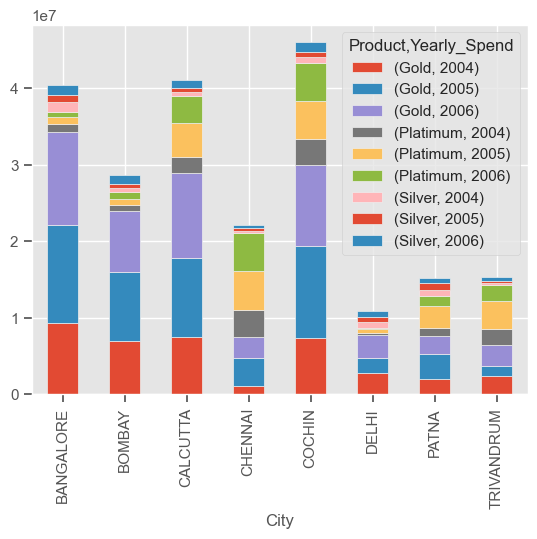

In [50]:
City_Wise_Data.plot(kind='bar',stacked=True)
plt.show()

### 4. Create graphs for
#### a. Monthly comparison of total spends, city wise

In [63]:
CS['Monthly_Spend'] = CS['Month'].dt.month

<Axes: xlabel='City'>

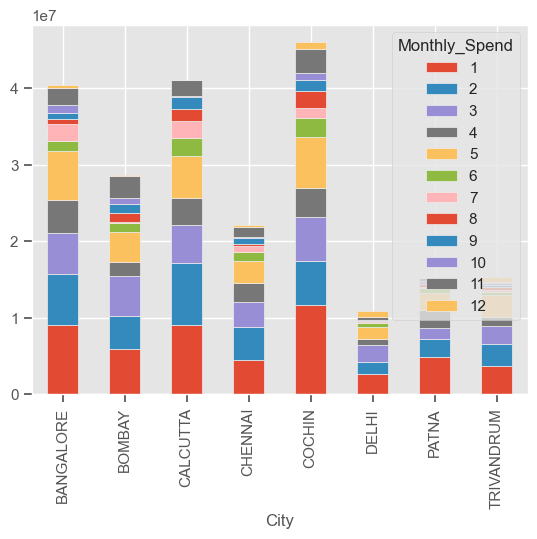

In [64]:
pivot_table = CS.pivot_table(index='City', columns='Monthly_Spend', 
                             values='Spend_Amount', aggfunc='sum')

pivot_table.plot(kind='bar', stacked=True)

#### b .Comparison of yearly spend on air tickets

In [65]:
CS.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount,Age group,Yearly_Spend,Monthly_Spend
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,71-80,2004,1
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,71-80,2004,1
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,71-80,2004,1
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,71-80,2004,1
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,71-80,2005,1


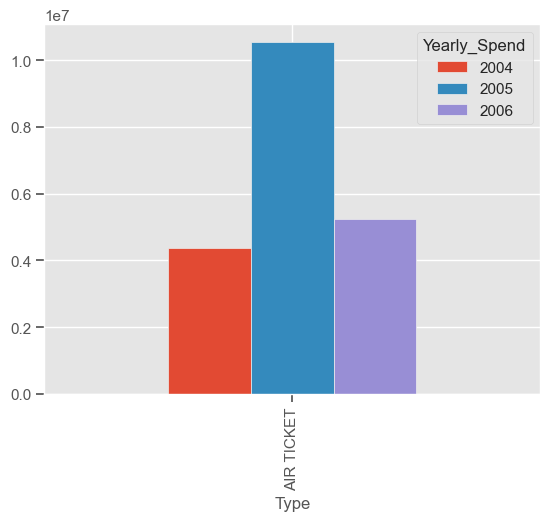

In [69]:
filtered_CS = CS[CS['Type'] == 'AIR TICKET']

pivot_table = filtered_CS.pivot_table(index='Type', columns='Yearly_Spend', 
                                      values='Spend_Amount', aggfunc='sum')

pivot_table.plot(kind='bar')
plt.show()


#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


<Axes: xlabel='Product'>

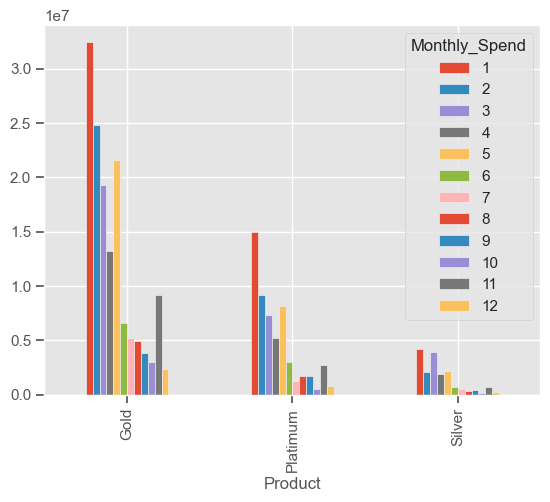

In [70]:
pd.pivot_table(data = CS, index = 'Product', columns='Monthly_Spend', 
               values='Spend_Amount', aggfunc='sum').plot(kind='bar')

<Axes: xlabel='Monthly_Spend'>

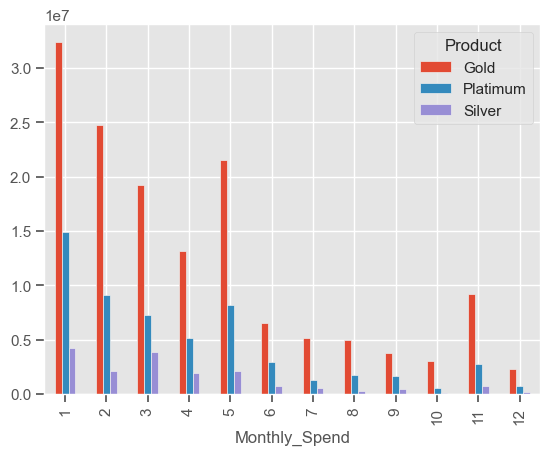

In [71]:
pd.pivot_table(data = CS, index = 'Monthly_Spend', columns='Product', 
               values='Spend_Amount', aggfunc='sum').plot(kind='bar')

###  Yes,there is a noticeable seasonality in terms of spend for each product.The graphs indicate that sales are consistently higher for all the Products during the months of:

#### January
#### February
#### March
#### April
#### May
### Out of these months,highest sales are in January

#### 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [76]:
def top10(product, Timeperiod):
    group_columns = ['City', CR.Month.dt.year.rename('Year'), CR.Customer]

    if product == 'Gold':
        group_columns.append(CR.Month.dt.month.rename('Month')) if Timeperiod == 'monthly' else None
    else:
        Timeperiod = 'yearly'

    result = CR.query(f'Product == "{product}"').groupby(group_columns)[['Repayment_Amount']].sum()
    result = result.sort_values(by=['City', 'Year', 'Month', 'Repayment_Amount' if Timeperiod == 'monthly' else 'Repayment_Amount'], ascending=[True, True, True, False if Timeperiod == 'monthly' else False])
    return result.groupby(['City', 'Year', 'Month']).head(10)

top10('Gold', 'monthly')


Repayment_Amount
City       Year Customer Month                  
BANGALORE  2004 A1       1            2241833.41
                A43      1            1906497.47
                A13      1            1627668.57
                A14      1             993114.87
                A30      1             379512.30
...                                          ...
TRIVANDRUM 2006 A28      2             318811.88
                         3            1547067.86
                         4             115326.71
                         5             930071.85
                         7             380460.40

[305 rows x 1 columns]

In [77]:
def top10(product,Timeperiod):
    if  product=='Gold' and Timeperiod=='monthly':
        result=CR.query('Product=="Gold"').groupby(['City',CR.Month.dt.year.rename('Year'),CR.Month.dt.month,'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Month','Repayment_Amount'],ascending=[True,True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Gold' and Timeperiod=='yearly':
        result=CR.query('Product=="Gold"').groupby(['City',CR.Month.dt.year.rename('Year'),'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Repayment_Amount'],ascending=[True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Silver' and Timeperiod=='monthly':
        result=CR.query('Product=="Silver"').groupby(['City',CR.Month.dt.year.rename('Year'),CR.Month.dt.month,'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Month','Repayment_Amount'],ascending=[True,True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Silver' and Timeperiod=='yearly':
        result=CR.query('Product=="Silver"').groupby(['City',CR.Month.dt.year.rename('Year'),'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Repayment_Amount'],ascending=[True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Platinum' and Timeperiod=='monthly':
        result=CR.query('Product=="Platimum"').groupby(['City',CR.Month.dt.year.rename('Year'),CR.Month.dt.month,'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Month','Repayment_Amount'],ascending=[True,True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
    if  product=='Platinum' and Timeperiod=='yearly':
        result=CR.query('Product=="Platimum"').groupby(['City',CR.Month.dt.year.rename('Year'),'Customer'])[['Repayment_Amount']].sum().sort_values(by=['City','Year','Repayment_Amount'],ascending=[True,True,False]).reset_index()
        return result.groupby(['City','Year','Month']).head(10)
top10('Gold','monthly')


,City,Year,Month,Customer,Repayment_Amount
0,BANGALORE,2004,1,A1,2241833.41
1,BANGALORE,2004,1,A43,1906497.47
2,BANGALORE,2004,1,A13,1627668.57
3,BANGALORE,2004,1,A14,993114.87
4,BANGALORE,2004,1,A30,379512.30
...,...,...,...,...,...
300,TRIVANDRUM,2006,2,A28,318811.88
301,TRIVANDRUM,2006,3,A28,1547067.86
302,TRIVANDRUM,2006,4,A28,115326.71
303,TRIVANDRUM,2006,5,A28,930071.85
